![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
season_descriptive = bikes.groupby('season').total.describe()

# Análisis descriptivo de 'hour'
hour_descriptive = bikes.groupby('hour').total.describe()

# Imprimir los resultados
print("Análisis descriptivo de la variable 'season':")
print(season_descriptive)
print("\nAnálisis descriptivo de la variable 'hour':")
print(hour_descriptive)

Análisis descriptivo de la variable 'season':
         count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

Análisis descriptivo de la variable 'hour':
      count        mean         std   min     25%    50%     75%    max
hour                                                                   
0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
1     454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0
2     448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0
3     433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0
4     442.0    6.407240    4.217633   1.0    3.00  

A partir del anterior analisis descriptivo se puede inferir lo siguiente:

* La temporada con mayor número de biciletas alquilada es en verano, mientras que la temporada que genera menor rentabilidad es invierno.

* La franja horaria que comprendida entre las 7 horas y las 20 horas es donde se genera mayor alquiler de biciletas. Sin embargo, entre las 23 horas y las 6 horas la demanda de las mismas es muy inferior frente a las demas franjas horarias.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

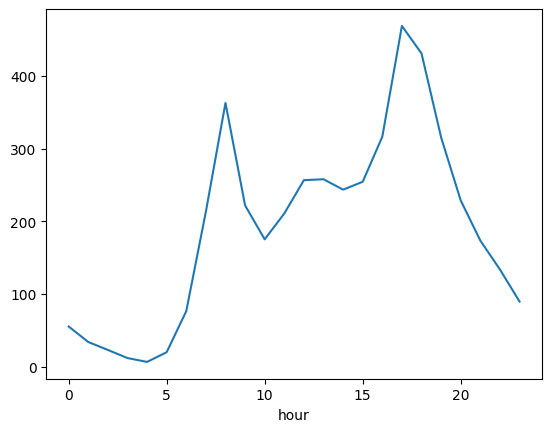

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

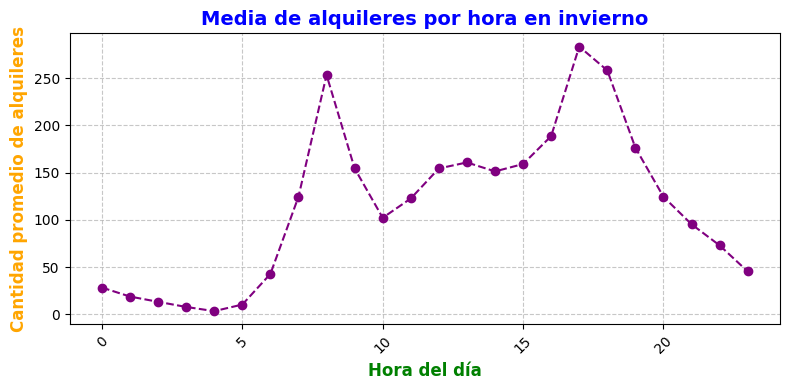

In [10]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
import matplotlib.pyplot as plt

winter_rentals = bikes[bikes['season'] == 1].groupby('hour').total.mean()
plt.figure(figsize=(8, 4))  
plt.plot(winter_rentals.index, winter_rentals.values, marker='o', color='purple', linestyle='--')  
plt.title('Media de alquileres por hora en invierno', fontsize=14, fontweight='bold', color='blue')  
plt.xlabel('Hora del día', fontsize=12, fontweight='bold', color='green')  
plt.ylabel('Cantidad promedio de alquileres', fontsize=12, fontweight='bold', color='orange')  
plt.grid(True, linestyle='--', alpha=0.7)  
plt.xticks(fontsize=10, rotation=45)  
plt.yticks(fontsize=10)  
plt.tight_layout()  
plt.show()


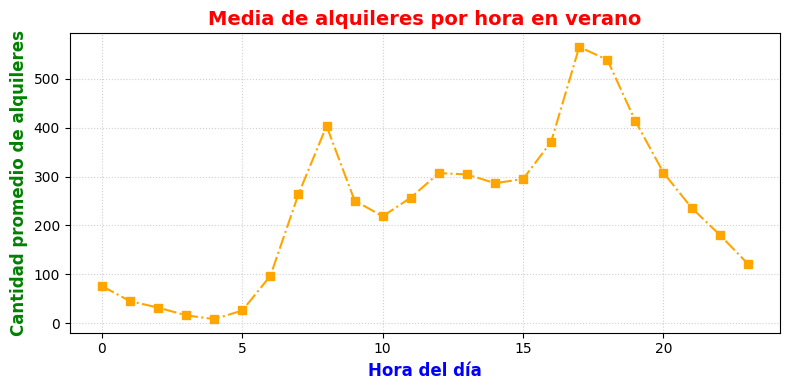

In [11]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos  
summer_rentals = bikes[bikes['season'] == 3].groupby('hour').total.mean()
plt.figure(figsize=(8, 4))  
plt.plot(summer_rentals.index, summer_rentals.values, marker='s', color='orange', linestyle='-.')  
plt.title('Media de alquileres por hora en verano', fontsize=14, fontweight='bold', color='red')  
plt.xlabel('Hora del día', fontsize=12, fontweight='bold', color='blue')  
plt.ylabel('Cantidad promedio de alquileres', fontsize=12, fontweight='bold', color='green')  
plt.grid(True, linestyle=':', alpha=0.6)  
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.tight_layout()  
plt.show()

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [13]:
# Celda 3

import pandas as pd
from sklearn.linear_model import LinearRegression

# Preprocesamiento de datos
X = bikes[['season', 'hour']]  # Variables predictoras
y = bikes['total']  # Variable de respuesta

# Definición del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo
model.fit(X, y)

# Impresión de los coeficientes
print("Coeficientes del modelo:")
print("Intercepto:", model.intercept_)
print("Coeficiente de 'season':", model.coef_[0])
print("Coeficiente de 'hour':", model.coef_[1])


Coeficientes del modelo:
Intercepto: 2.5848513346812183
Coeficiente de 'season': 26.951308510673893
Coeficiente de 'hour': 10.52129823657616


* Coeficiente de 'hour': Este coeficiente indica cómo cambia el valor esperado de alquileres de bicleta cuando se aumenta en una unidad la hora del día, manteniendo constante la estación. Un coeficiente de 10.52 significa que, en promedio, se espera que la cantidad de alquileres aumente en 10.52 unidades por cada hora adicional del día.

* Coeficiente de 'Season': Este coeficiente indica cómo cambia el valor de alquileres de bicicleta cuando se cambia de una estación a otra, manteniendo constante la hora del día. Un coeficiente positivo como 26.95 implica que, en promedio, hay un aumento de 26.95 en la cantidad de alquileres cuando la estación cambia de la categoría de referencia a la estación representada por este coeficiente.

Por otro lado, como limitaciones se tedría:

La regresión lineal es adecuada para modelar relaciones lineales simples entre las variables predictoras y la variable de respuesta. Sin embargo, puede tener dificultades para capturar relaciones más complejas o no lineales entre las variables, lo que podría sesgar las estimaciones de los coeficientes y reducir la capacidad predictiva del modelo. En casos donde la relación es más compleja, se pueden explorar otros métodos de modelado más avanzados

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [14]:
# Celda 4
X = bikes[['season', 'hour']]
y = bikes['total']

In [15]:
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [16]:
# Impresión variable a usar (hour)
j = 1
print(X.columns[j])

hour


In [17]:
# División de la variable hours en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [18]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [19]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

-27775.88300816515

In [20]:
# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

-138889.2339678902

In [21]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [22]:
# Ganancia de la variable 'Hours' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

10610.413579790038

In [23]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [24]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

(1, 8.0, 18268.811823533004)

In [25]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [26]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 3594, 7292)

In [27]:
y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 55.437673900946024, 258.6715578716402)

In [28]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [29]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 7207.700659959655},
 'sr': {'y_pred': 1,
  'y_prob': 258.6007677543186,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 7392.920792160614}}

In [30]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 382.8088308604629},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 743.095592335012}},
  'sr': {'y_pred': 1,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': [0, 2.0],
   'n_samples': 455,
   'gain': 5197.1071057533845,
   'sl': {'y_pred': 1,
    'y_prob': 122.27826086956522,
    'level': 3,
    'split': -1,
    'n_samples': 113,
    'gain': 0},
   'sr': {'y_pred': 1,
    'y_pr

In [31]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted


In [32]:
# Ejecución de función tree_predict
tree_predict(X, tree)

array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [33]:
# Celda 5

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Dividir los datos en conjuntos de entrenamiento y validación
X_entrenamiento, X_validacion, y_entrenamiento, y_validacion = train_test_split(bikes[['season', 'hour']], bikes['total'], test_size=0.2, random_state=42)

# Definir el árbol de decisiones
modelo_arbol = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

# Entrenar el modelo
modelo_arbol.fit(X_entrenamiento, y_entrenamiento)

# Predecir en el conjunto de validación
y_prediccion = modelo_arbol.predict(X_validacion)

# Calcular métricas de desempeño
mse = mean_squared_error(y_validacion, y_prediccion)
mae = mean_absolute_error(y_validacion, y_prediccion)
r2 = r2_score(y_validacion, y_prediccion)

print("Métricas de desempeño del modelo de árbol de decisiones:")
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)


Métricas de desempeño del modelo de árbol de decisiones:
Error cuadrático medio (MSE): 14954.905409445191
Error absoluto medio (MAE): 82.89776163168133
Coeficiente de determinación (R^2): 0.5469162763064426


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [34]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [35]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [36]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [41]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Árbol de decisión
# Crear el clasificador de árbol de decisión con un parámetro de profundidad máxima igual a 5
arbol_decision_model = DecisionTreeClassifier(max_depth=5)
# Entrenar el modelo
arbol_decision_model.fit(X_train, y_train)
# Predecir en el conjunto de prueba
y_pred_arbol_decision = arbol_decision_model.predict(X_test)
# Calcular la precisión y la puntuación F1
precision_arbol_decision = accuracy_score(y_test, y_pred_arbol_decision)
f1_arbol_decision = f1_score(y_test, y_pred_arbol_decision, average='macro')

print("Modelo de árbol de decisión:")
print("Precisión (Accuracy):", precision_arbol_decision)
print("Puntuación F1:", f1_arbol_decision)

# Regresión logística
# Crear el clasificador de regresión logística
regresion_logistica_model = LogisticRegression()
# Entrenar el modelo
regresion_logistica_model.fit(X_train, y_train)
# Predecir en el conjunto de prueba
y_pred_regresion_logistica = regresion_logistica_model.predict(X_test)
# Calcular la precisión y la puntuación F1
precision_regresion_logistica = accuracy_score(y_test, y_pred_regresion_logistica)
f1_regresion_logistica = f1_score(y_test, y_pred_regresion_logistica, average='macro')

print("Modelo de regresión logística:")
print("Precisión (Accuracy):", precision_regresion_logistica)
print("Puntuación F1:", f1_regresion_logistica)


Modelo de árbol de decisión:
Precisión (Accuracy): 0.6373333333333333
Puntuación F1: 0.6354434722937039
Modelo de regresión logística:
Precisión (Accuracy): 0.6133333333333333
Puntuación F1: 0.6133085850827786


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [45]:
# Celda 7

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Entrenar 100 árboles de decisión con diferentes valores de max_depth
tree_models_max_depth = []
for _ in range(100):
    tree_model = DecisionTreeClassifier(max_depth=5)  # Puedes ajustar max_depth según tus preferencias
    tree_model.fit(X_train, y_train)
    tree_models_max_depth.append(tree_model)

# Entrenar 100 árboles de decisión con diferentes valores de min_samples_leaf
tree_models_min_samples_leaf = []
for _ in range(100):
    tree_model = DecisionTreeClassifier(min_samples_leaf=5)  # Puedes ajustar min_samples_leaf según tus preferencias
    tree_model.fit(X_train, y_train)
    tree_models_min_samples_leaf.append(tree_model)

# Entrenar 100 modelos de regresión logística
logistic_models = []
for _ in range(100):
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)
    logistic_models.append(logistic_model)

# Realizar predicciones con cada conjunto de modelos
tree_predictions_max_depth = [model.predict(X_test) for model in tree_models_max_depth]
tree_predictions_min_samples_leaf = [model.predict(X_test) for model in tree_models_min_samples_leaf]
logistic_predictions = [model.predict(X_test) for model in logistic_models]

# Calcular la votación mayoritaria para cada conjunto de predicciones
ensemble_predictions = []
for i in range(len(y_test)):
    votes = np.sum([tree_predictions_max_depth[j][i] for j in range(100)]) + \
            np.sum([tree_predictions_min_samples_leaf[j][i] for j in range(100)]) + \
            np.sum([logistic_predictions[j][i] for j in range(100)])
    majority_vote = 1 if votes > 150 else 0  # Umbral de 150 votos para la votación mayoritaria
    ensemble_predictions.append(majority_vote)

# Calcular métricas para el ensamble de modelos
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)

print("Resultados del Ensemble de Votación Mayoritaria:")
print("Precisión del Modelo (Accuracy):", ensemble_accuracy)
print("Puntuación F1 del Modelo:", ensemble_f1)


Resultados del Ensemble de Votación Mayoritaria:
Precisión del Modelo (Accuracy): 0.6213333333333333
Puntuación F1 del Modelo: 0.6302083333333334


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [47]:
# Celda 8

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Entrenar 100 árboles de decisión con diferentes valores de max_depth
tree_models_max_depth = []
for _ in range(100):
    tree_model = DecisionTreeClassifier(max_depth=5)  # Puedes ajustar max_depth según tus preferencias
    tree_model.fit(X_train, y_train)
    tree_models_max_depth.append(tree_model)

# Entrenar 100 árboles de decisión con diferentes valores de min_samples_leaf
tree_models_min_samples_leaf = []
for _ in range(100):
    tree_model = DecisionTreeClassifier(min_samples_leaf=5)  # Puedes ajustar min_samples_leaf según tus preferencias
    tree_model.fit(X_train, y_train)
    tree_models_min_samples_leaf.append(tree_model)

# Entrenar 100 modelos de regresión logística
logistic_models = []
for _ in range(100):
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)
    logistic_models.append(logistic_model)

# Realizar predicciones con cada conjunto de modelos
tree_predictions_max_depth = [model.predict(X_test) for model in tree_models_max_depth]
tree_predictions_min_samples_leaf = [model.predict(X_test) for model in tree_models_min_samples_leaf]
logistic_predictions = [model.predict(X_test) for model in logistic_models]

# Calcular predicciones ponderadas para cada conjunto de modelos
weighted_predictions = []
for i in range(len(y_test)):
    weighted_vote = (np.sum([tree_predictions_max_depth[j][i] for j in range(100)]) * 0.4) + \
                    (np.sum([tree_predictions_min_samples_leaf[j][i] for j in range(100)]) * 0.4) + \
                    (np.sum([logistic_predictions[j][i] for j in range(100)]) * 0.2)
    weighted_prediction = 1 if weighted_vote > 0.5 else 0  # Umbral de 0.5 para la votación ponderada
    weighted_predictions.append(weighted_prediction)

# Calcular métricas para el ensamble de modelos con votación ponderada
weighted_accuracy = accuracy_score(y_test, weighted_predictions)
weighted_f1 = f1_score(y_test, weighted_predictions)

print("Resultados del Ensemble de Votación Ponderada:")
print("Precisión del Modelo (Accuracy):", weighted_accuracy)
print("Puntuación F1 del Modelo:", weighted_f1)


Resultados del Ensemble de Votación Ponderada:
Precisión del Modelo (Accuracy): 0.5906666666666667
Puntuación F1 del Modelo: 0.6848049281314168


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9

Comparando los resultados de los modelos de Ensemble de Votación Mayoritaria y Votación Ponderada, observamos lo siguiente:

### Ensemble de Votación Mayoritaria:
- Precisión del Modelo (Accuracy): 0.6213
- Puntuación F1 del Modelo: 0.6302

### Ensemble de Votación Ponderada:
- Precisión del Modelo (Accuracy): 0.5907
- Puntuación F1 del Modelo: 0.6848

#### Posibles ventajas y desventajas:

**Votación Mayoritaria:**
- **Ventajas:**
  - Mayor precisión en comparación con la Votación Ponderada (Accuracy: 0.6213 vs 0.5907).
  - Simplicidad en la implementación, ya que solo requiere contar votos.
- **Desventajas:**
  - Puede no considerar la contribución relativa de cada modelo en la predicción final.
  - No pondera la importancia de los modelos individuales en la votación.

**Votación Ponderada:**
- **Ventajas:**
  - Considera la importancia relativa de cada modelo al asignar pesos a las predicciones.
  - Puede adaptarse mejor a situaciones donde ciertos modelos son más confiables que otros.
- **Desventajas:**
  - Requiere determinar los pesos para cada modelo, lo que puede ser subjetivo o requerir ajuste.
  - Mayor complejidad en la implementación en comparación con la Votación Mayoritaria.

En resumen, la Votación Mayoritaria es más simple pero puede ser menos precisa, mientras que la Votación Ponderada ofrece una mayor flexibilidad al considerar la importancia de cada modelo, pero puede requerir una mayor complejidad en la configuración y ajuste de pesos.